# Catmull-Rom Spline

In [1]:
from __future__ import annotations

import matplotlib.pyplot as plt
import numpy as np
import shapely
import shapely.plotting

import catsmoothing as cs
from catsmoothing import CatmullRom

Let's start by fitting a Catmull-Rom Spline with different `alpha` values for a set of points:

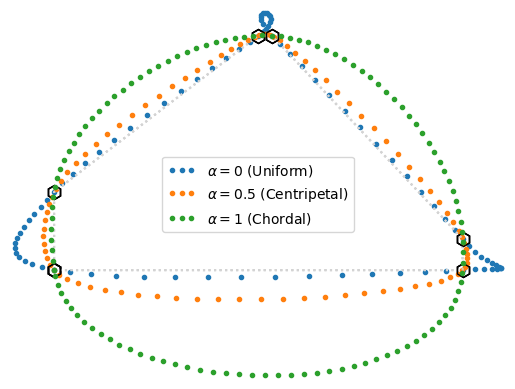

In [2]:
verts = [(0, 0), (0, 0.5), (1.5, 1.5), (1.6, 1.5), (3, 0.2), (3, 0)]
orig = {}
fig, ax = plt.subplots()
labels = {
    0: r"$\alpha = 0$ (Uniform)",
    0.5: r"$\alpha = 0.5$ (Centripetal)",
    1: r"$\alpha = 1$ (Chordal)",
}
n_pts = 15
smoothed = {}
for alpha, label in labels.items():
    s = CatmullRom(verts, alpha=alpha, bc_type="closed")
    dots = int((s.grid[-1] - s.grid[0]) * n_pts) + 1
    distances = s.grid[0] + np.arange(dots) / n_pts
    smoothed[alpha] = s.evaluate(distances)
    ax.plot(
        *s.evaluate(s.grid).T,
        color="lightgrey",
        linestyle=":",
        marker="h",
        markersize=10,
        markeredgecolor="black",
        markerfacecolor="none",
    )
    ax.plot(*smoothed[alpha].T, marker=".", ls="", label=label)
    ax.legend(loc="center", numpoints=3)
    ax.set_axis_off()
    ax.margins(0.01)
fig.savefig("images/alpha.png", bbox_inches="tight", dpi=90)

Next, let's smooth a `Polygon`.

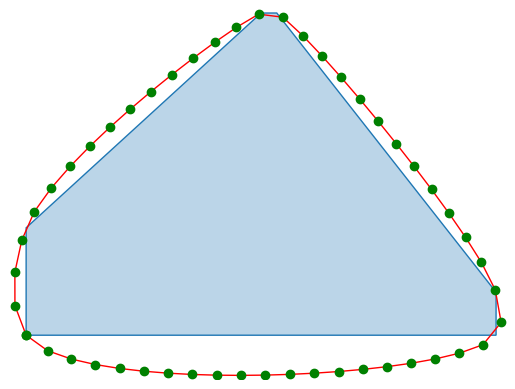

In [3]:
poly = shapely.Polygon(verts)
ploy_smoothed = cs.smooth_polygon(poly, n_pts=50)
fig, ax = plt.subplots()
_ = shapely.plotting.plot_polygon(poly, ax=ax, add_points=False)
_ = shapely.plotting.plot_polygon(
    ploy_smoothed, ax=ax, color="g", edgecolor="red", facecolor="none"
)
ax.set_axis_off()
ax.margins(0.01)
fig.savefig("images/poly.png", bbox_inches="tight", dpi=90)

In [4]:
poly = shapely.Polygon(verts)
ploy_smoothed = cs.smooth_polygon(poly, n_pts=50)

Finally, let's smooth a noisy `LineString`.

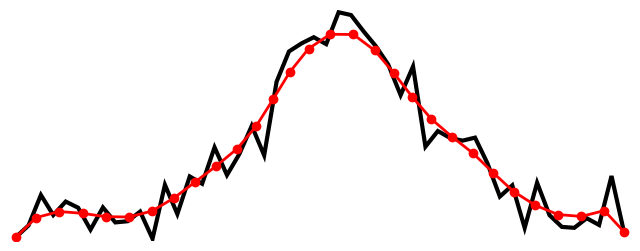

In [5]:
rng = np.random.default_rng(123)
x = np.linspace(-3, 2.5, 50)
y = np.exp(-(x**2)) + 0.1 * rng.standard_normal(50)
line = shapely.LineString(np.c_[x, y])
line_smoothed = cs.smooth_linestrings(line, n_pts=30, gaussian_sigmas=2)
fig, ax = plt.subplots(figsize=(8, 3))
_ = shapely.plotting.plot_line(line, ax=ax, add_points=False, color="k", linewidth=3)
_ = shapely.plotting.plot_line(line_smoothed, ax=ax, color="r")
ax.set_axis_off()
ax.margins(0.01)
fig.savefig("images/line.png", bbox_inches="tight", dpi=90)

We can then compute the tangents at each point of the smoothed `LineString` and plot them. Note that tangents are angles in radians.

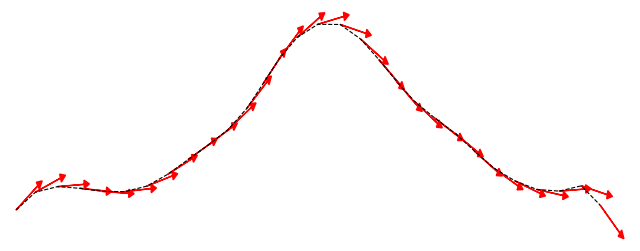

In [6]:
tangents = cs.linestrings_tangent_angles(line_smoothed)
vertices = shapely.get_coordinates(line_smoothed)
dx, dy = np.cos(tangents), np.sin(tangents)

fig, ax = plt.subplots(figsize=(8, 3))
ax.plot(vertices[:, 0], vertices[:, 1], "k--", label="Line", lw=0.8)
for x, y, v in zip(dx, dy, vertices, strict=False):
    ax.arrow(v[0], v[1], x * 0.25, y * 0.25, head_width=0.05, head_length=0.05, fc="r", ec="r")
ax.set_axis_off()
ax.margins(0.01)
fig.savefig("images/tangents.png", bbox_inches="tight", dpi=90)